In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graph One

Create a graph of the percentage of papers for each research area for start-ups, companies and other institutional types.

In [2]:
df = pd.read_csv(r'..\final_data\final_tidy.csv')

C:\Users\aidan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Start-ups

In [4]:
df.head(1)

,Unnamed: 0,eid,pub_year,afid,name,area_code,inc_year,type,start-up,journal_id,res_area,cites_10_yrs,cs_2011,res_area_perc,sci_jr,snip
0,0,2-s2.0-0034123014,2000,60025225,University of Southampton,NaN,NaN,education,0,23352,ECON,21,5.0,93.0,3.615,2.512


In [11]:
su_count = df[df['start-up'] == 1].groupby(by='res_area').count()['eid']

In [14]:
su_perc = (su_count / su_count.sum()) * 100.0

### Companies

In [21]:
co_count = df[(df['type'] == 'company') & (df['start-up'] == 0)].groupby(by='res_area').count()['eid']

In [22]:
co_perc = (co_count / co_count.sum()) * 100.0

### All Others

In [58]:
ot_count = df[df['start-up'] == 0].groupby(by='res_area').count()['eid']

In [59]:
ot_perc = (ot_count / ot_count.sum()) * 100.0

### Combine

In [62]:
comb = pd.concat([su_perc, ot_perc, co_perc], axis=1)
comb.columns = ['start_up', 'all_others', 'companies']

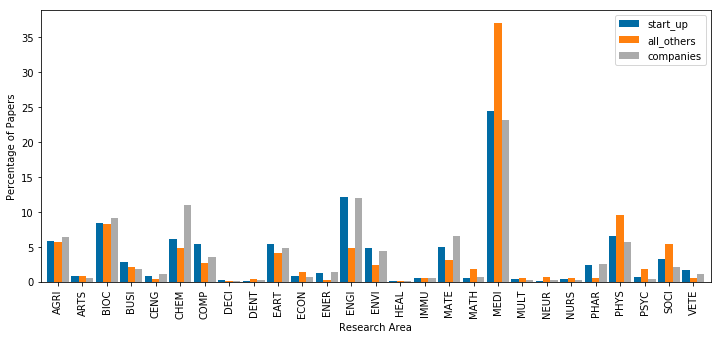

In [63]:
plt.style.use('tableau-colorblind10')
comb.plot.bar(figsize=(12,5), width=0.9)
plt.xlabel('Research Area')
plt.ylabel('Percentage of Papers')
plt.savefig('res_area_plt.pdf')
plt.show()

In [65]:
comb.loc['CHEM',:]

start_up       6.073961
all_others     4.833284
companies     11.041708
Name: CHEM, dtype: float64

# Graph Two

Create a graph showing the quantitative evaluation results.

In [383]:
results = pd.read_csv(r'..\embeddings\test_results.csv')

In [384]:
totals = results.sum().copy()[5:]

In [78]:
totals

doc2vec_100         6384
doc2vec_300         6122
doc2vec_500         6064
doc2vec_1000        6036
glove_50            7211
glove_100           7157
glove_200           7107
glove_300           7134
word2vec_100        7493
word2vec_300        7556
word2vec_500        7581
word2vec_1000       7581
specter_768         7389
tfidf_100           5166
tfidf_300           5796
tfidf_500           5973
word2vec_300_pre    7460
dtype: object

In [385]:
data = {'dims': [50, 100, 200, 300, 500, 768, 1000],
        'd2v': [np.nan, 63.84, np.nan, 61.22, 60.64, np.nan, 60.36],
        'glove': [72.11, 71.57, 71.07, 71.34, np.nan, np.nan, np.nan],
        'w2v': [np.nan, 74.93, np.nan, 75.56, 75.81, np.nan, 75.81],
        'tfidf': [np.nan, 51.66, np.nan, 57.96, 59.73, np.nan, 58.69],
        'SPECTER': [np.nan, np.nan, np.nan, np.nan, np.nan, 73.89, np.nan],
        'w2v_pre': [np.nan, np.nan, np.nan, 74.60, np.nan, np.nan, np.nan]}

In [386]:
d = pd.DataFrame(data=data)

In [387]:
d = d[['dims', 'tfidf', 'glove', 'w2v_pre', 'w2v', 'd2v', 'SPECTER']]

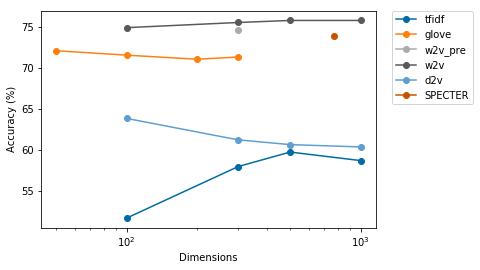

In [388]:
fig, ax = plt.subplots()
#ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for model in d.columns[1:]:
    x = d['dims'].values
    y = d[f'{model}'].values
    valid_idx = np.argwhere(~np.isnan(y))
    ax.plot(x[valid_idx], y[valid_idx], '-o', label=f'{model}')

# formatting
plt.xlabel('Dimensions')
plt.ylabel('Accuracy (%)')
#plt.title('Triplet Evaluation Results')
ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('quant_eval.pdf', bbox_inches='tight')

# Graph Two

Produce three subplots showing the hyperparameter sweep through perplexity.

In [390]:
df_10 = pd.read_csv(r'..\embeddings\final_viz_tsne_full_perp=10.csv')
df_30 = pd.read_csv(r'..\embeddings\final_viz_tsne_full.csv')
df_50 = pd.read_csv(r'..\embeddings\final_viz_tsne_full_perp=50.csv')
pca = pd.read_csv(r'..\embeddings\final_viz_pca.csv')

C:\Users\aidan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [391]:
area = df_10['res_area'].values
d_10 = df_10[['dim_1', 'dim_2']].values
d_30 = df_30[['dim_1', 'dim_2']].values
d_50 = df_50[['dim_1', 'dim_2']].values
pca = pca[['dim_1', 'dim_2']].values

In [392]:
area[(area != 'ECON') & (area != 'PSYC')] = 'OTHER'

In [393]:
other_idx = np.argwhere(area == 'OTHER')
econ_idx = np.argwhere(area == 'ECON')
psyc_idx = np.argwhere(area == 'PSYC')

In [394]:
d_10[other_idx,0]

array([[  1.5147976],
       [ -1.5257893],
       [  4.985579 ],
       ...,
       [ -7.0544014],
       [  2.5625145],
       [-17.547976 ]])

In [395]:
import matplotlib as mpl

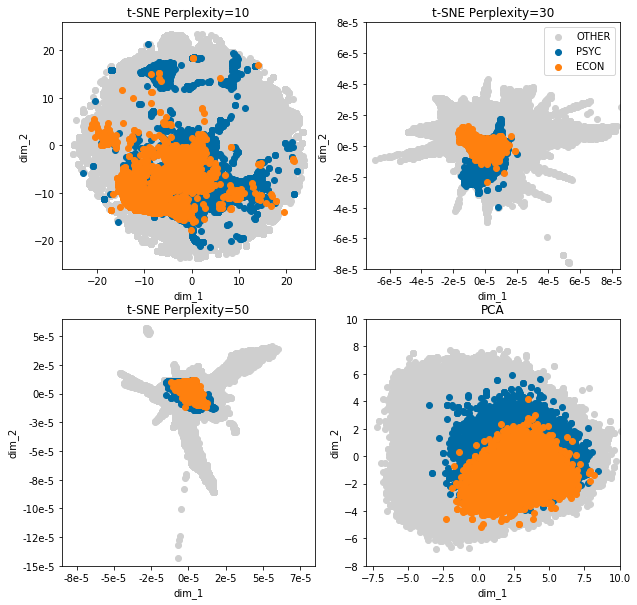

In [494]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

# plot perp=10
axs[0,0].scatter(d_10[other_idx,0], d_10[other_idx,1], c='#CFCFCF', label='OTHER')
axs[0,0].scatter(d_10[psyc_idx,0], d_10[psyc_idx,1], c='#006BA4', label='PSYC')
axs[0,0].scatter(d_10[econ_idx,0], d_10[econ_idx,1], c='#FF800E', label='ECON')
axs[0,0].title.set_text('t-SNE Perplexity=10')

# plot perp=30
axs[0,1].scatter(d_30[other_idx,0], d_30[other_idx,1], c='#CFCFCF', label='OTHER')
axs[0,1].scatter(d_30[psyc_idx,0], d_30[psyc_idx,1], c='#006BA4', label='PSYC')
axs[0,1].scatter(d_30[econ_idx,0], d_30[econ_idx,1], c='#FF800E', label='ECON')
axs[0,1].title.set_text('t-SNE Perplexity=30')
axs[0,1].set_xlim([-0.000075, 0.000085])
axs[0,1].set_ylim([-0.00008, 0.00008])
fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
axs[0,1].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
axs[0,1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

# plot perp=50
axs[1,0].scatter(d_50[other_idx,0], d_50[other_idx,1], c='#CFCFCF', label='OTHER')
axs[1,0].scatter(d_50[psyc_idx,0], d_50[psyc_idx,1], c='#006BA4', label='PSYC')
axs[1,0].scatter(d_50[econ_idx,0], d_50[econ_idx,1], c='#FF800E', label='ECON')
axs[1,0].title.set_text('t-SNE Perplexity=50')
axs[1,0].set_xlim([-0.000085, 0.000085])
axs[1,0].set_ylim([-0.00015, 0.000065])
axs[1,0].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
axs[1,0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

# plot pca
axs[1,1].scatter(pca[other_idx,0], pca[other_idx,1], c='#CFCFCF', label='OTHER')
axs[1,1].scatter(pca[psyc_idx,0], pca[psyc_idx,1], c='#006BA4', label='PSYC')
axs[1,1].scatter(pca[econ_idx,0], pca[econ_idx,1], c='#FF800E', label='ECON')
axs[1,1].title.set_text('PCA')
axs[1,1].set_xlim([-8,10])
axs[1,1].set_ylim([-8,10])

# formatting
handles, labels = axs[1,1].get_legend_handles_labels()
axs[0,1].legend(handles, labels, loc='upper right')

# axes titles
axs[0,0].set_xlabel('dim_1')
axs[0,1].set_xlabel('dim_1')
axs[1,0].set_xlabel('dim_1')
axs[1,1].set_xlabel('dim_1')

axs[0,0].set_ylabel('dim_2')
axs[0,1].set_ylabel('dim_2')
axs[1,0].set_ylabel('dim_2')
axs[1,1].set_ylabel('dim_2')

plt.savefig('dim_red.png')
plt.show()

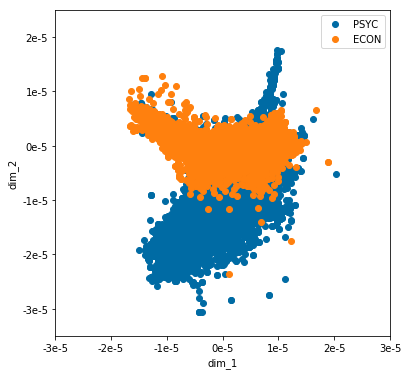

In [498]:
fig, ax = plt.subplots(figsize=(6,6))

# plot perp=30
ax.scatter(d_30[psyc_idx,0], d_30[psyc_idx,1], label='PSYC')
ax.scatter(d_30[econ_idx,0], d_30[econ_idx,1], label='ECON')

# formatting
ax.set_xlim([-0.00003, 0.00003])
ax.set_ylim([-0.000035, 0.000025])
ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
#fig.suptitle('Psychology Versus Economics')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

plt.savefig('psych_econ.pdf')

# Graph Three

Plot the different areas with start-ups highlighted a different colour.

In [310]:
bioc = df_30[df_30['res_area'] == 'BIOC']
su = bioc['start-up'].values
su_idx = np.argwhere(su == 1)
other_idx = np.argwhere(su == 0)

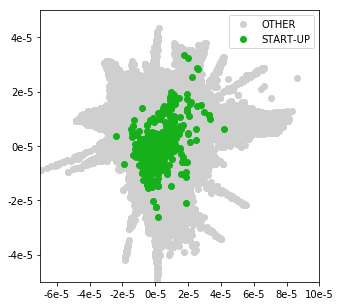

In [499]:
# plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(d_30[other_idx,0], d_30[other_idx,1], c='#CFCFCF', label='OTHER')
ax.scatter(d_30[su_idx,0], d_30[su_idx,1], c='#15B01A', label='START-UP')

# formatting
ax.set_xlim([-0.00007, 0.0001])
ax.set_ylim([-0.00005, 0.00005])

fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

plt.show()

# Graph Four

Histogram of start-up citations.

In [429]:
# create startup only df
su_only = df_30[df_30['start-up'] == 1]
not_su = df_30[df_30['start-up'] == 0]

In [458]:
not_su['cites_10_yrs'].skew()

45.03459775511971

In [423]:
su_only.sort_values(by='cites_10_yrs', ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,eid,pub_year,afid,name,area_code,inc_year,type,start-up,journal_id,res_area,cites_10_yrs,cs_2011,res_area_perc,sci_jr,snip,title,dim_1,dim_2
841247,841247,841247,2-s2.0-70349568754,2009,107910433,Constellation Energy Commodities Group,WC,2004.0,company,1,28567,PHYS,11395,4.6,89.0,1.660,1.172,QUANTUM ESPRESSO: A modular and open-source so...,0.000003,1.552137e-06
840851,840851,840851,2-s2.0-70149101223,2009,113207637,Worldwide Clinical Trials,NG,2007.0,company,1,15847,MEDI,4219,56.0,99.0,13.674,12.685,Ticagrelor versus clopidogrel in patients with...,0.000003,7.467514e-06
891875,891875,891875,2-s2.0-0034611996,2000,100321203,International Obesity TaskForce,NW,1999.0,company,1,51748,MEDI,3808,10.3,94.0,1.546,1.990,Establishing a standard definition for child o...,0.000007,-5.991474e-06
507670,507670,507670,2-s2.0-26844503270,2005,60110866,Frontier Science (Scotland) Ltd,PH,2001.0,company,1,15847,MEDI,2881,56.0,99.0,13.674,12.685,Trastuzumab after adjuvant chemotherapy in HER...,-0.000015,3.852868e-06
449079,449079,449079,2-s2.0-85066456886,2004,100321203,International Obesity TaskForce,NW,1999.0,company,1,16590,MEDI,2454,45.0,99.0,7.583,11.645,Appropriate body-mass index for Asian populati...,0.000008,-8.251015e-06
976131,976131,976131,2-s2.0-33847074909,2007,101640651,Field Genetics Limited,W,2003.0,company,1,20297,AGRI,2381,9.8,97.0,3.508,1.844,Revising how the computer program CERVUS accom...,-0.000003,5.534389e-06
507514,507514,507514,2-s2.0-17244373777,2005,100340292,KuDOS Pharmaceuticals Ltd.,CB,1997.0,company,1,21206,MEDI,2065,53.1,99.0,17.598,8.652,Targeting the DNA repair defect in BRCA mutant...,-0.000008,-1.167719e-05
977988,977988,977988,2-s2.0-55549089660,2008,60109102,Oxford Nanopore Technologies,OX,2005.0,company,1,21206,MEDI,2048,53.1,99.0,17.598,8.652,Accurate whole human genome sequencing using r...,-0.000009,4.913077e-06
1020842,1020842,1020842,2-s2.0-33645231857,2006,112741305,Mundipharma International Limited,CB,2006.0,company,1,13222,MEDI,1735,7.1,87.0,1.557,1.676,"Survey of chronic pain in Europe: Prevalence, ...",0.000009,-2.464950e-08
507513,507513,507513,2-s2.0-33751547539,2006,101442324,Inpharmatica Ltd.,WC,1997.0,company,1,20425,MEDI,1709,28.1,98.0,6.281,4.940,How many drug targets are there?,0.000001,2.297270e-06


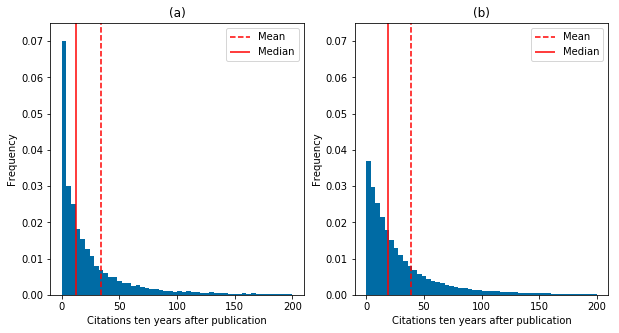

In [457]:
# create plot
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].hist(su_only['cites_10_yrs'], range=(0, 200), bins=50, density=True)
ax[1].hist(not_su['cites_10_yrs'], range=(0, 200), bins=50, density=True)

# add mean and median
ax[0].vlines(su_only['cites_10_yrs'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[0].vlines(su_only['cites_10_yrs'].median(), 0, 5000, color='r', label='Median')
ax[1].vlines(not_su['cites_10_yrs'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[1].vlines(not_su['cites_10_yrs'].median(), 0, 5000, color='r', label='Median')

# formatting
ax[0].set_title('(a)')
ax[0].set_xlabel('Citations ten years after publication')
ax[0].set_ylabel('Frequency')
ax[0].set_ylim(0, 0.075)
ax[1].set_title('(b)')
ax[1].set_xlabel('Citations ten years after publication')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, 0.075)

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[1:], labels[1:], loc='upper right')
ax[1].legend(handles[1:], labels[1:], loc='upper right')

plt.savefig('cite_hist.pdf')
plt.show()

# Graph Five

Citations, CiteScore and Percentile for start-ups, all other, and companies.

In [466]:
df_30.cs_2011.describe()

count    975144.000000
mean          5.779327
std           6.324895
min           0.000000
25%           2.400000
50%           4.400000
75%           7.100000
max          76.600000
Name: cs_2011, dtype: float64

In [459]:
# create startup only df
su_only = df_30[df_30['start-up'] == 1]
not_su = df_30[df_30['start-up'] == 0]
co_only = df_30[(df_30['type'] == 'company') & (df_30['start-up'] == 0)]

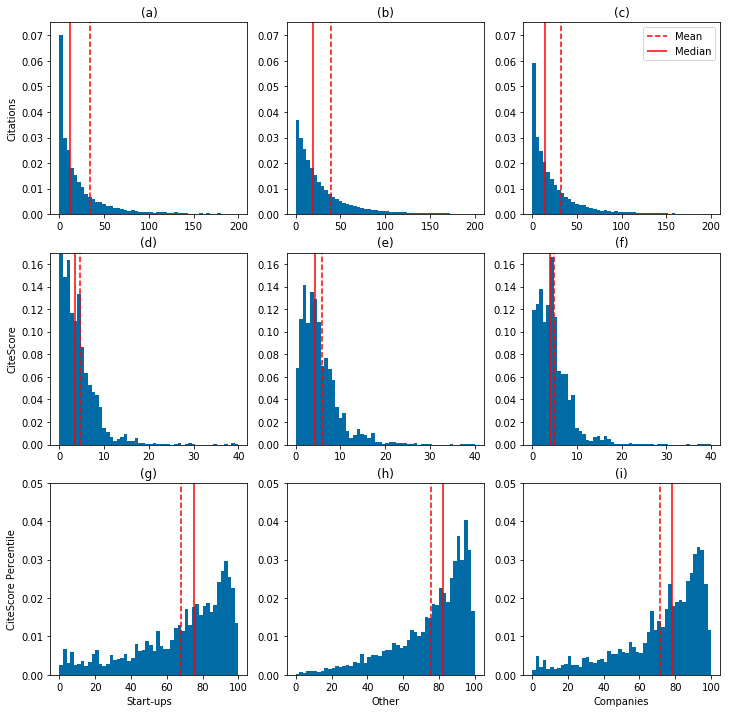

In [481]:
# create plot
fig, ax = plt.subplots(3, 3, figsize=(12,12))

### make plots

# cites
ax[0,0].hist(su_only['cites_10_yrs'], range=(0, 200), bins=50, density=True)
ax[0,1].hist(not_su['cites_10_yrs'], range=(0, 200), bins=50, density=True)
ax[0,2].hist(co_only['cites_10_yrs'], range=(0, 200), bins=50, density=True)

# citescore
ax[1,0].hist(su_only['cs_2011'], range=(0, 40), bins=50, density=True)
ax[1,1].hist(not_su['cs_2011'], range=(0, 40), bins=50, density=True)
ax[1,2].hist(co_only['cs_2011'], range=(0, 40), bins=50, density=True)

# percentile
ax[2,0].hist(su_only['res_area_perc'], range=(0, 100), bins=50, density=True)
ax[2,1].hist(not_su['res_area_perc'], range=(0, 100), bins=50, density=True)
ax[2,2].hist(co_only['res_area_perc'], range=(0, 100), bins=50, density=True)


### add mean and median

# cites
ax[0,0].vlines(su_only['cites_10_yrs'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[0,0].vlines(su_only['cites_10_yrs'].median(), 0, 5000, color='r', label='Median')
ax[0,1].vlines(not_su['cites_10_yrs'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[0,1].vlines(not_su['cites_10_yrs'].median(), 0, 5000, color='r', label='Median')
ax[0,2].vlines(co_only['cites_10_yrs'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[0,2].vlines(co_only['cites_10_yrs'].median(), 0, 5000, color='r', label='Median')

# citescore
ax[1,0].vlines(su_only['cs_2011'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[1,0].vlines(su_only['cs_2011'].median(), 0, 5000, color='r', label='Median')
ax[1,1].vlines(not_su['cs_2011'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[1,1].vlines(not_su['cs_2011'].median(), 0, 5000, color='r', label='Median')
ax[1,2].vlines(co_only['cs_2011'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[1,2].vlines(co_only['cs_2011'].median(), 0, 5000, color='r', label='Median')

# percentile
ax[2,0].vlines(su_only['res_area_perc'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[2,0].vlines(su_only['res_area_perc'].median(), 0, 5000, color='r', label='Median')
ax[2,1].vlines(not_su['res_area_perc'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[2,1].vlines(not_su['res_area_perc'].median(), 0, 5000, color='r', label='Median')
ax[2,2].vlines(co_only['res_area_perc'].mean(), 0, 5000, color='r', linestyles='dashed', label='Mean')
ax[2,2].vlines(co_only['res_area_perc'].median(), 0, 5000, color='r', label='Median')

### formatting

# axes limits
ax[0,0].set_ylim(0, 0.075)
ax[0,1].set_ylim(0, 0.075)
ax[0,2].set_ylim(0, 0.075)
ax[1,0].set_ylim(0, 0.17)
ax[1,1].set_ylim(0, 0.17)
ax[1,2].set_ylim(0, 0.17)
ax[2,0].set_ylim(0, 0.05)
ax[2,1].set_ylim(0, 0.05)
ax[2,2].set_ylim(0, 0.05)

# axes titles
ax[2,0].set_xlabel('Start-ups')
ax[2,1].set_xlabel('Other')
ax[2,2].set_xlabel('Companies')
ax[0,0].set_ylabel('Citations')
ax[1,0].set_ylabel('CiteScore')
ax[2,0].set_ylabel('CiteScore Percentile')

# subplot titles
ax[0,0].set_title('(a)')
ax[0,1].set_title('(b)')
ax[0,2].set_title('(c)')
ax[1,0].set_title('(d)')
ax[1,1].set_title('(e)')
ax[1,2].set_title('(f)')
ax[2,0].set_title('(g)')
ax[2,1].set_title('(h)')
ax[2,2].set_title('(i)')

# legend
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].legend(handles[1:], labels[1:], loc='upper right')

plt.savefig('paper_quality.pdf')
plt.show()

# Unique AFIDs

In [412]:
df_30[df_30['type'] == f'{affil_type}']['afid'].unique().shape

(3464,)

In [416]:
for affil_type in df_30['type'].unique():
    num_afids = df_30[df_30['type'] == f'{affil_type}']['afid'].unique().shape
    print(affil_type, ':', num_afids[0])

education : 3464
resi : 1173
healthcare : 3888
archive : 79
company : 15357
other : 244
government : 488
Nonprofit : 510


In [418]:
df_30[(df_30['type'] == 'company') & (df_30['start-up'] == 0)]['afid'].unique().shape[0]

10738

In [485]:
co_only.sort_values(by='cites_10_yrs', ascending=False)

,Unnamed: 0,Unnamed: 0.1,eid,pub_year,afid,name,area_code,inc_year,type,start-up,journal_id,res_area,cites_10_yrs,cs_2011,res_area_perc,sci_jr,snip,title,dim_1,dim_2
8091,8091,8091,2-s2.0-0001752768,2002,60028832,Cambridge Crystallographic Data Centre,NaN,NaN,company,0,24645,BIOC,7593,NaN,NaN,NaN,NaN,The Cambridge Structural Database: A quarter o...,-0.000009,6.237705e-06
1016055,1016055,1016055,2-s2.0-64149097786,2009,100804608,Sigma-Aldrich,NaN,NaN,company,0,26786,MEDI,6909,11.4,95.0,2.604,2.242,The MIQE guidelines: Minimum information for p...,0.000002,5.738541e-08
580241,580241,580241,2-s2.0-69949162760,2009,60004219,AstraZeneca,NaN,NaN,company,0,15847,MEDI,5771,56.0,99.0,13.674,12.685,Gefitinib or carboplatin-paclitaxel in pulmona...,-0.000021,5.716330e-06
27541,27541,27541,2-s2.0-0038377458,2003,60002731,QinetiQ,NaN,NaN,company,0,29067,PHYS,5561,2.0,57.0,0.956,1.514,GEANT4 - A simulation toolkit,0.000003,5.853516e-07
580242,580242,580242,2-s2.0-70149101223,2009,60004219,AstraZeneca,NaN,NaN,company,0,15847,MEDI,4219,56.0,99.0,13.674,12.685,Ticagrelor versus clopidogrel in patients with...,0.000003,7.467514e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82754,82754,82754,2-s2.0-77957112053,2002,60108923,Sellafield Ltd,NaN,NaN,company,0,19700180719,ENGI,0,NaN,NaN,NaN,NaN,Modelling Charpy property changes due to irrad...,0.000002,-2.715387e-06
82755,82755,82755,2-s2.0-77957036972,2002,60015726,"The Welding Institute, Cambridge",NaN,NaN,company,0,19700180719,ENGI,0,NaN,NaN,NaN,NaN,Validation of idealised Charpy impact energy t...,-0.000006,5.342030e-06
82756,82756,82756,2-s2.0-85086353803,2001,112999228,HR Wallirgford,NaN,NaN,company,0,76881,ENGI,0,NaN,NaN,NaN,NaN,Standard specifications for flow measurement s...,0.000003,-3.255129e-08
82757,82757,82757,2-s2.0-85046909857,2001,101757143,Ha'Crow Group Ltd.,NaN,NaN,company,0,76881,ENGI,0,NaN,NaN,NaN,NaN,Long-term morphological cariations of a sandba...,-0.000003,5.270307e-07


# Graph Five (?)

Plot the start-up papers against all other papers.

In [504]:
su = df_30[df_30['start-up'] == 1]
other = df_30[df_30['start-up'] == 0]

In [512]:
su_dim_1 = su['dim_1'].values
su_dim_2 = su['dim_2'].values
other_dim_1 = other['dim_1'].values
other_dim_2 = other['dim_2'].values

In [ ]:
#006BA4 = blue
#FF800E = orange
#CFCFCF = grey

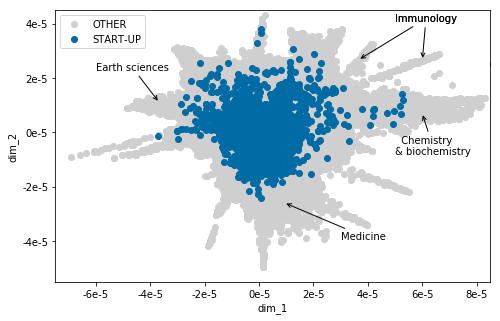

In [604]:
# plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(other_dim_1, other_dim_2, c='#CFCFCF', label='OTHER') # grey
ax.scatter(su_dim_1, su_dim_2, c='#006BA4', label='START-UP') # blue

# formatting
ax.set_xlim([-0.000075, 0.000085])
ax.set_ylim([-0.000055, 0.000045])
ax.set_aspect('equal')

fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

ax.legend(loc='upper left')

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')

# annotate
ax.annotate('  Chemistry \n& biochemistry',
            xy=(0.00006, 0.00000702),
            xycoords='data',
            textcoords='data',
            xytext=(0.00005, -0.000009),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Immunology',
            xy=(0.00003661, 0.00002672),
            xycoords='data',
            textcoords='data',
            xytext=(0.00005, 0.00004),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Immunology',
            xy=(0.00006007, 0.00002667),
            xycoords='data',
            textcoords='data',
            xytext=(0.00005, 0.00004),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Earth sciences',
            xy=(-0.0000368, 0.0000111),
            xycoords='data',
            textcoords='data',
            xytext=(-0.00006, 0.000022),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Medicine',
            xy=(0.0000093, -0.0000259),
            xycoords='data',
            textcoords='data',
            xytext=(0.00003, -0.00004),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

plt.savefig('su_vs_other.pdf')
plt.show()

# Graph Six

Graph of three most common research areas for start-ups.

In [594]:
co = df_30[(df_30['type'] == 'company') & (df_30['start-up'] == 0)]

In [595]:
su_medi = su[su['res_area'] == 'MEDI']
other_medi = other[other['res_area'] == 'MEDI']
su_engi = su[su['res_area'] == 'ENGI']
other_engi = other[other['res_area'] == 'ENGI']
su_bioc = su[su['res_area'] == 'BIOC']
other_bioc = other[other['res_area'] == 'BIOC']

co_medi = co[co['res_area'] == 'MEDI']
co_engi = co[co['res_area'] == 'ENGI']
co_bioc = co[co['res_area'] == 'BIOC']

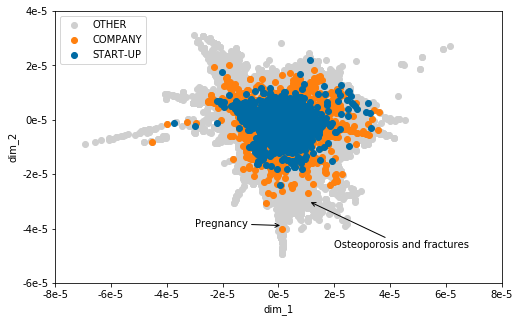

In [608]:
# plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(other_medi['dim_1'], other_medi['dim_2'], c='#CFCFCF', label='OTHER')
ax.scatter(co_medi['dim_1'], co_medi['dim_2'], c='#FF800E', label='COMPANY')
ax.scatter(su_medi['dim_1'], su_medi['dim_2'], c='#006BA4', label='START-UP')

# formatting
ax.set_xlim([-0.00008, 0.00008])
ax.set_ylim([-0.00006, 0.00004])
#ax.set_aspect('equal')

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')

fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

# annotate
ax.annotate('Pregnancy',
            xy=(0.0000013,-0.0000389),
            xycoords='data',
            textcoords='data',
            xytext=(-0.00003, -0.00004),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Osteoporosis and fractures',
            xy=(0.0000109,-0.00003),
            xycoords='data',
            textcoords='data',
            xytext=(0.00002, -0.000048),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.legend(loc='upper left')

plt.savefig('medi.pdf')
plt.show()

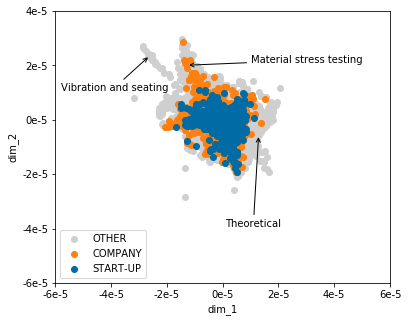

In [612]:
# plot
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(other_engi['dim_1'], other_engi['dim_2'], c='#CFCFCF', label='OTHER')
ax.scatter(co_engi['dim_1'], co_engi['dim_2'], c='#FF800E', label='COMPANY')
ax.scatter(su_engi['dim_1'], su_engi['dim_2'], c='#006BA4', label='START-UP')

# formatting
ax.set_xlim([-0.00006, 0.00006])
ax.set_ylim([-0.00006, 0.00004])
#ax.set_aspect('equal')

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')

fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

# annotate
ax.annotate('Vibration and seating',
            xy=(-0.0000262,0.00002349),
            xycoords='data',
            textcoords='data',
            xytext=(-0.000058, 0.00001),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Material stress testing',
            xy=(-0.0000128,0.00002008),
            xycoords='data',
            textcoords='data',
            xytext=(0.00001, 0.00002008),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Theoretical',
            xy=(0.0000129,-0.00000564),
            xycoords='data',
            textcoords='data',
            xytext=(0.000001, -0.00004),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.legend(loc='lower left')

plt.savefig('engi.pdf')
plt.show()

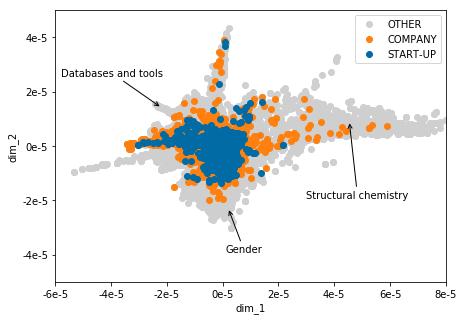

In [615]:
# plot
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(other_bioc['dim_1'], other_bioc['dim_2'], c='#CFCFCF', label='OTHER')
ax.scatter(co_bioc['dim_1'], co_bioc['dim_2'], c='#FF800E', label='COMPANY')
ax.scatter(su_bioc['dim_1'], su_bioc['dim_2'], c='#006BA4', label='START-UP')

# formatting
ax.set_xlim([-0.00006, 0.00008])
ax.set_ylim([-0.00005, 0.00005])
#ax.set_aspect('equal')

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')

fmt = lambda x, pos: '{:.0f}e-5'.format(x*1e5, pos)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

# annotate
ax.annotate('Databases and tools',
            xy=(-0.0000220,0.00001415),
            xycoords='data',
            textcoords='data',
            xytext=(-0.000058, 0.000025),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Structural chemistry',
            xy=(0.0000454,0.0000091),
            xycoords='data',
            textcoords='data',
            xytext=(0.00003, -0.00002),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.annotate('Gender',
            xy=(0.000002,-0.00002295),
            xycoords='data',
            textcoords='data',
            xytext=(0.000001, -0.00004),
            arrowprops=dict(arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.legend(loc='upper right')

plt.savefig('bioc.pdf')
plt.show()

In [618]:
df_30.eid.unique().shape

(743896,)